In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys

from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)

# Now, try importing onedmodel
from onedmodel import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

## Plot fraction of trajectories when escaping in 1D

In [3]:
# Initialise
nSGD = 10**3
nsamples = 10**3
shuffle = True
batch_size= 20
lr = 0.01
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
df = sgd_runner.generate_trajectories(model)

/Users/guime/projects/SLTforSGD/code/lib/onedmodel.py:318: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction)


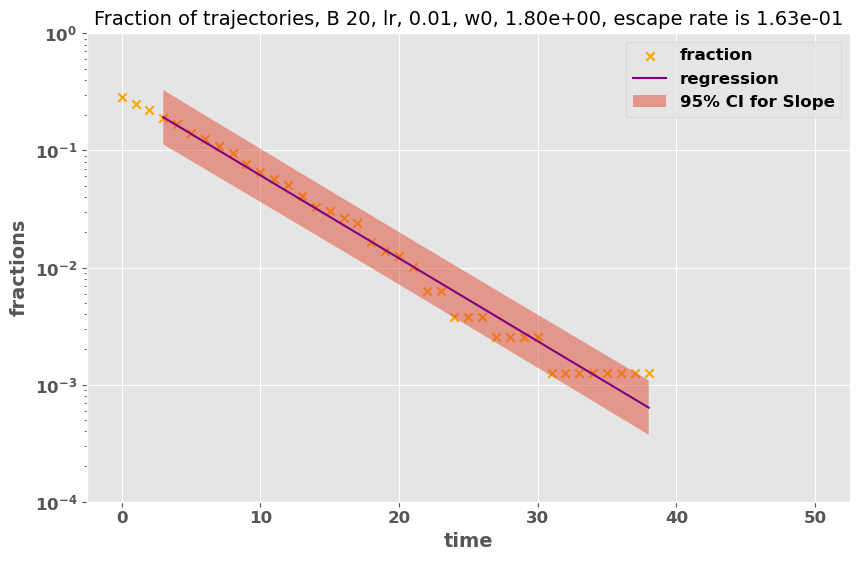

In [4]:
%matplotlib inline
trajectories = np.asarray(df['trajectory'].to_list())
clean_traj = trajectories[~np.isnan(trajectories).any(axis=1)]
fraction = regular_fraction(clean_traj, model)
escape_rate, error = compute_escape_rate(fraction, frac_max=frac_max, tmin=3,
                            batch_size=batch_size, lr=0.01, w0=w0)

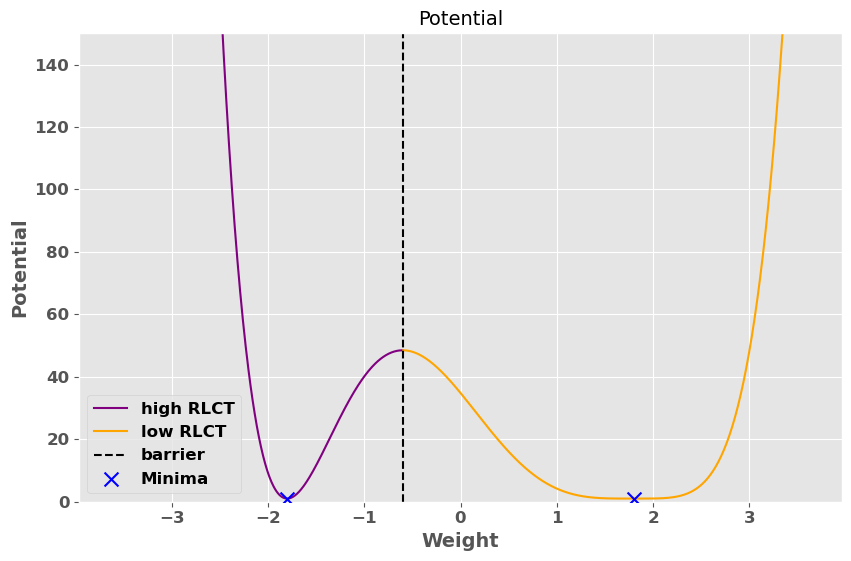

In [6]:
plot_potential(model, nsamp = 10**4, ymax = 150)

## Plot trajectories when escaping in 2D

In [ ]:
# Initialise
nSGD = 1
nsamples = 10**3
shuffle = True
batch_size= 30
lr = 0.01
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-3
model = PolyModel2D(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
df = sgd_runner.generate_trajectories(model)

# Plot fraction of trajectories when stuck

In [20]:
# Initialise
nSGD = 5*10**3
nsamples = 5*10**3
shuffle = True
batch_size= 20
lr = 0.01
w0 = 1.3
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
df = sgd_runner.generate_trajectories(model)

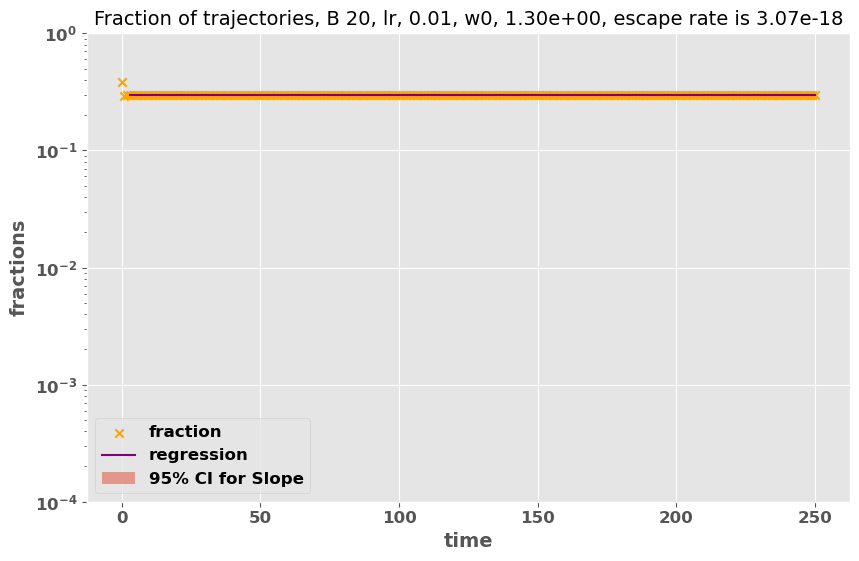

In [21]:
%matplotlib inline
trajectories = np.asarray(df['trajectory'].to_list())
clean_traj = trajectories[~np.isnan(trajectories).any(axis=1)]
fraction = regular_fraction(clean_traj, model)
escape_rate, error = compute_escape_rate(fraction, frac_max=frac_max, tmin=3,
                            batch_size=batch_size, lr=0.01, w0=w0)

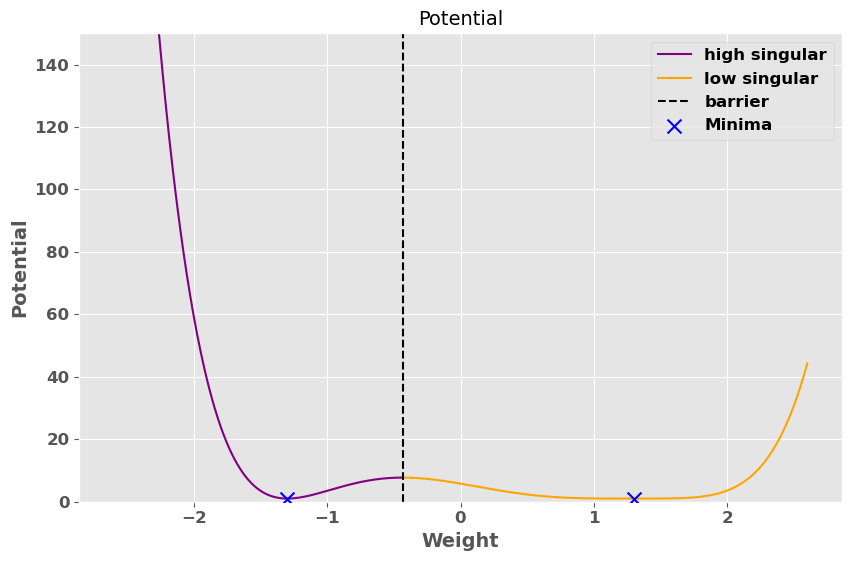

In [22]:
show_potential(model, nsamp = 10**4, ymax = 150)

Experiment 0 over 20
Experiment 10 over 20


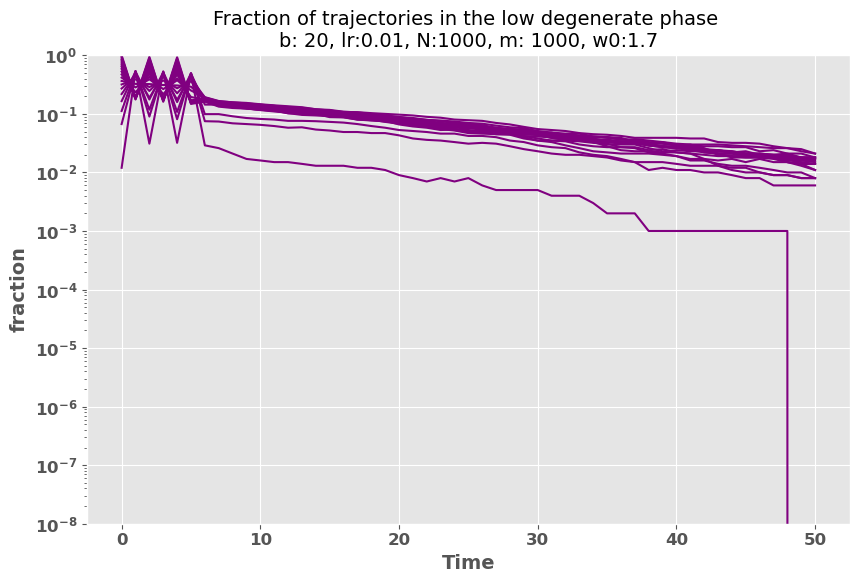

In [34]:
# Vary initialisation to compute escape rate
wbarrier = (model.w0*model.d1 - model.w0*model.d2)/(model.d1 + model.d2)
nexp = 20
window_size = 
escape_rate = []
ymin = 1e-8
wmins = np.linspace(wbarrier - window_size, wbarrier - 0.1, nexp)
wmaxs = np.linspace(wbarrier, wbarrier + window_size, nexp)
for i in range(nexp):
    if i%10 == 0:
        print(f"Experiment {i} over {nexp}")
    wmin = wmins[i]
    wmax = wmaxs[i]
    model = PolyModel(w0=w0, seed=seed_init, wmin=wmin, wmax=wmax)
    sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                            batch_size=batch_size, auto=True)
    df = sgd_runner.generate_trajectories(model)
    trajectories = df["trajectory"].to_list()
    trajectories = np.asarray(trajectories)
    fraction = regular_fraction(trajectories, model)
    nit = len(fraction)
    time = np.arange(0, nit,1)
    plt.plot(time, fraction[time], color="purple")
plt.xlabel("Time")
plt.ylabel("fraction")
plt.yscale("log")
plt.title("Fraction of trajectories in the low degenerate phase \n" 
            f"b: {sgd_runner.batch_size}, lr:{sgd_runner.lr}, N:{sgd_runner.nSGD}, m: {sgd_runner.nsamples}, w0:{model.w0}")
plt.ylim((ymin,1))
plt.show()


Text(0.5, 1.0, 'Escape rate along sliding window \nb: 20, lr:0.01, N:1000, m: 1000, w0:2 \nwindow size 8, min boundary from -8.666666666666666 to -0.7666666666666666')

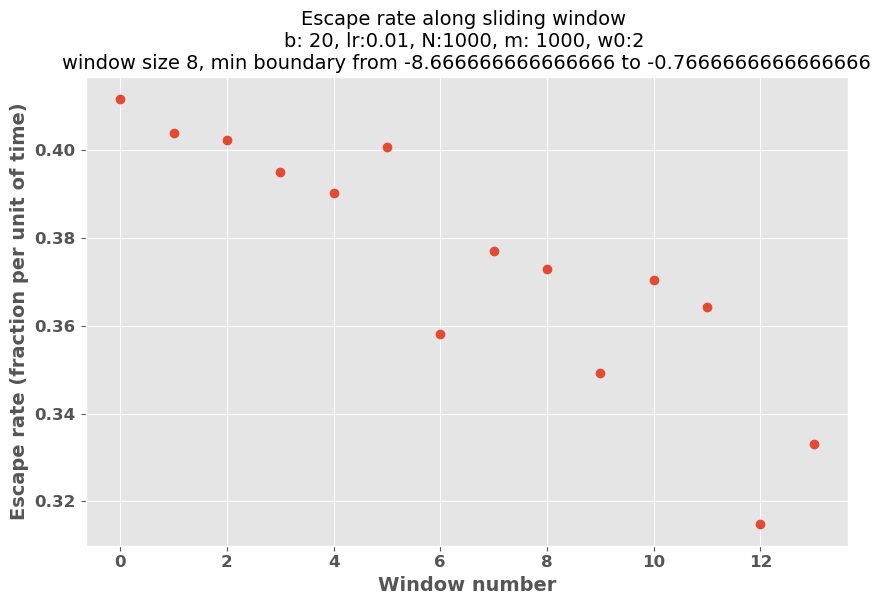

In [30]:
x = np.arange(0, len(escape_rate))
plt.plot(x, escape_rate, 'o')
plt.ylabel("Escape rate (fraction per unit of time)")
plt.xlabel("Window number")
plt.title("Escape rate along sliding window \n" 
            f"b: {sgd_runner.batch_size}, lr:{sgd_runner.lr}, N:{sgd_runner.nSGD}, m: {sgd_runner.nsamples}, w0:{model.w0} \n" 
            f"window size {window_size}, min boundary from {wmins[0]} to {wmins[-1]}")

# Look at the influence of hyperparameters

In [5]:
nSGD = 10**3
nsamples = 10**3
shuffle = True
seed_init = 1
seed_data = 1
w0 = 1
nw0 = 2

model = PolyModel(w0=w0, nw0=nw0, seed=seed_init)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           auto=True)
w0_range = np.arange(1.3, 2, 0.2)
batch_range = np.arange(5, 40, 5)
lr_range = [0.1, 0.01, 0.001]

sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, model)

Running experiment 0 over 84
trajectory 0 over 1000
The 2-parent path is /Users/guime/projects/sgd_singular/sgd_on_singularities
Running experiment 1 over 84
trajectory 0 over 1000
The 2-parent path is /Users/guime/projects/sgd_singular/sgd_on_singularities
Running experiment 2 over 84
trajectory 0 over 1000


KeyboardInterrupt: 

(0.001, 1)

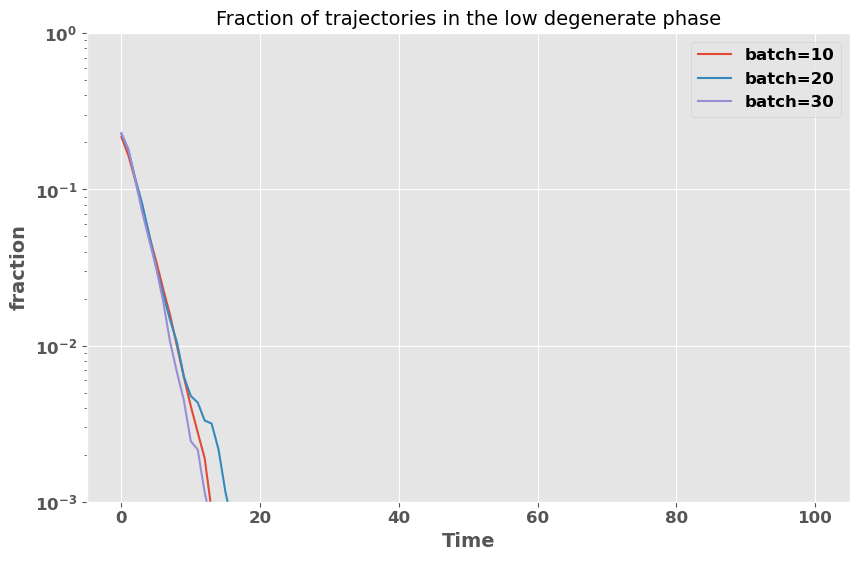

In [12]:
for batch_size in batch_range:
    model = PolyModel(d1=d1, d2=d2, w0=w0, nw0=nw0)
    fpath = Path('../data')
    fname = f"experiment_d1_{d1}_d2_{d2}_w0_{w0}_lr_{lr}_momentum_{momentum}_batch_{batch_size}_niter_{niter}.csv"
    fpath = fpath.joinpath(fname)
    trajectories = read_clean_trajectories(fpath)
    fraction = regular_fraction(trajectories, model)
    nit = len(fraction)
    time = np.arange(0, nit,1)
    plt.plot(time, fraction[time], label = f"batch={batch_size}")
plt.xlabel("Time")
plt.ylabel("fraction")
plt.yscale("log")
plt.legend()
plt.title("Fraction of trajectories in the low degenerate phase")
plt.ylim((0.001,1))

FileNotFoundError: [Errno 2] No such file or directory: '../data/experiment_d1_1_d2_2_w0_2_lr_0.001_momentum_0_batch_20_niter_20.csv'

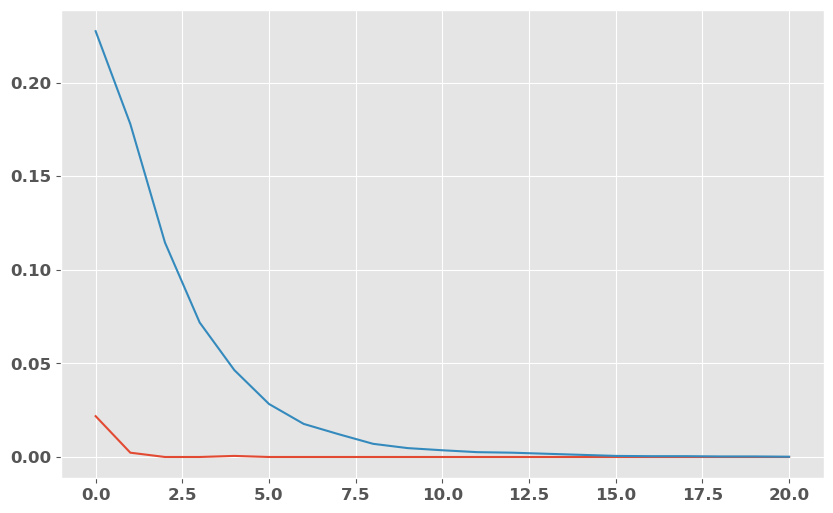

In [16]:
niter = 20
batch_size = 20
for lr in lr_range:
    model = PolyModel(d1=d1, d2=d2, w0=w0, nw0=nw0)
    fpath = Path('../data')
    fname = f"experiment_d1_{d1}_d2_{d2}_w0_{w0}_lr_{lr}_momentum_{momentum}_batch_{batch_size}_niter_{niter}.csv"
    fpath = fpath.joinpath(fname)
    trajectories = read_clean_trajectories(fpath)
    fraction = regular_fraction(trajectories, model)
    nit = len(fraction)
    time = np.arange(0, nit,1)
    plt.plot(time, fraction[time], label = f"lr={lr}")
plt.xlabel("Time")
plt.ylabel("fraction")
plt.yscale("log")
plt.legend()
plt.title("Fraction of trajectories in the low singular phase")
plt.ylim((0.001,1))